In [42]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [43]:
bc=pd.read_csv(r"C:\Users\shuarya\Downloads\archive\Wisconsin Breast Cancer.csv")

In [44]:
bc.shape

(569, 33)

In [45]:
bc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [46]:
bc.dropna(axis=1,inplace=True)

In [47]:
bc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [48]:
bc.diagnosis=bc.diagnosis.replace({"M":0,"B":1})

In [49]:
bc.diagnosis.value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [50]:
bc=bc.drop(['id'],axis=1)

In [51]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [52]:
from sklearn.model_selection import train_test_split
bc_train,bc_test=train_test_split(bc,test_size=.2)

In [53]:
bc_train_x=bc_train.iloc[:,1::]
bc_train_y=bc_train.iloc[:,0]

In [54]:
bc_test_x=bc_test.iloc[:,1::]
bc_test_y=bc_test.iloc[:,0]

In [55]:
from keras.models import Sequential 
from keras.layers import  Dense 
from tensorflow.keras.utils import to_categorical


In [61]:
model = Sequential()
model.add(Dense(units=16,activation="relu",input_dim=30))
model.add(Dense(units=8,activation="relu"))
model.add(Dense(units=6,activation="relu"))
model.add(Dense(units=1,activation="sigmoid"))
model.add(Dense(3, activation='softmax'))

# sequential means the exexicution of the model

In [62]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [63]:
bc_train_x.shape



(455, 30)

In [64]:
bc_train_y.shape

(455,)

In [76]:
m1=model.fit(bc_train_x,bc_train_y,batch_size=1,epochs=50)

Epoch 1/50
455/455 [==============================] - 1s 1ms/step - loss: 0.1847 - accuracy: 0.9363
Epoch 2/50
455/455 [==============================] - 1s 1ms/step - loss: 0.1763 - accuracy: 0.9407
Epoch 3/50
455/455 [==============================] - 1s 1ms/step - loss: 0.1792 - accuracy: 0.9341
Epoch 4/50
455/455 [==============================] - 1s 1ms/step - loss: 0.1796 - accuracy: 0.9209
Epoch 5/50
455/455 [==============================] - 1s 1ms/step - loss: 0.1624 - accuracy: 0.9495
Epoch 6/50
455/455 [==============================] - 1s 1ms/step - loss: 0.1623 - accuracy: 0.9385
Epoch 7/50
455/455 [==============================] - 1s 1ms/step - loss: 0.1669 - accuracy: 0.9231
Epoch 8/50
455/455 [==============================] - 1s 1ms/step - loss: 0.1951 - accuracy: 0.9297
Epoch 9/50
455/455 [==============================] - 1s 1ms/step - loss: 0.2046 - accuracy: 0.9363
Epoch 10/50
455/455 [==============================] - 1s 1ms/step - loss: 0.1793 - accuracy: 0.9319

In [67]:
model.evaluate(bc_test_x,bc_test_y)

4/4 [==============================] - 0s 2ms/step - loss: 0.2134 - accuracy: 0.9123


[0.21336773037910461, 0.9122806787490845]

In [68]:
pred=model.predict(bc_test_x)
pred

4/4 [==============================] - 0s 2ms/step


array([[9.54718053e-01, 4.52670902e-02, 1.48703748e-05],
       [9.54718053e-01, 4.52670902e-02, 1.48703748e-05],
       [5.16591221e-02, 9.48340774e-01, 9.56110782e-08],
       [1.53620139e-01, 8.46379459e-01, 4.37175430e-07],
       [5.01956381e-02, 9.49804306e-01, 9.19020735e-08],
       [7.35216260e-01, 2.64778197e-01, 5.54744565e-06],
       [7.93805420e-02, 9.20619249e-01, 1.73129877e-07],
       [3.42188403e-02, 9.65781152e-01, 5.43067102e-08],
       [2.49523789e-01, 7.50475287e-01, 8.81646088e-07],
       [9.54718053e-01, 4.52670902e-02, 1.48703748e-05],
       [9.54718053e-01, 4.52670902e-02, 1.48703748e-05],
       [9.54718053e-01, 4.52670902e-02, 1.48703748e-05],
       [9.54715729e-01, 4.52693775e-02, 1.48700692e-05],
       [7.78007507e-02, 9.22199011e-01, 1.68365858e-07],
       [9.49846148e-01, 5.01396433e-02, 1.42375375e-05],
       [4.24609408e-02, 9.57538962e-01, 7.30148955e-08],
       [9.97573808e-02, 9.00242388e-01, 2.37984665e-07],
       [7.83479512e-01, 2.16513

In [77]:
pred_classes = np.argmax(pred , axis =1 )

In [78]:
from sklearn.metrics import confusion_matrix
tab=confusion_matrix(bc_test_y ,pred_classes )
tab

array([[43,  5],
       [ 5, 61]], dtype=int64)

In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(bc_test_y ,pred_classes )

0.9122807017543859

In [80]:
from sklearn import metrics 
from sklearn.metrics import f1_score

classification_report = metrics.classification_report(bc_test_y ,pred_classes )
print(classification_report)

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        48
           1       0.92      0.92      0.92        66

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



In [82]:
df1 = pd.DataFrame(m1.history)
df1

,loss,accuracy
0,0.184737,0.936264
1,0.176335,0.940659
2,0.179212,0.934066
3,0.179571,0.920879
4,0.162369,0.949451
5,0.162299,0.938462
6,0.166890,0.923077
7,0.195065,0.929670
8,0.204635,0.936264
9,0.179271,0.931868


KeyError: 'val_accuracy'

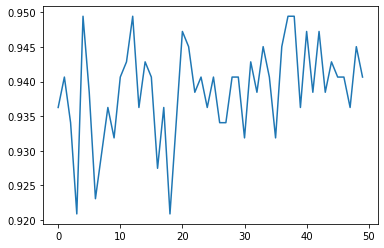

In [84]:
plt.plot(m1.history['accuracy'])
plt.plot(m1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='center right')
plt.show()

KeyError: 'val_loss'

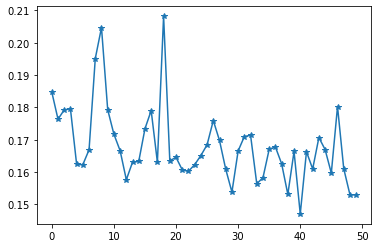

In [85]:
plt.plot(m1.history['loss'],marker='*')
plt.plot(m1.history['val_loss'],marker='*') 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Valdation', 'Loss'], loc='upper right') 
plt.show()